In [23]:
!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

import requests                           
from bs4 import BeautifulSoup             


from sklearn.decomposition import PCA 

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [131]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/brayan-ahumada/Deep_Learning/main/NFLX.csv")
df_acciones

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4865,2021-09-20,586.789978,591.530029,568.080017,575.429993,575.429993,3732200
4866,2021-09-21,578.309998,581.880005,569.369995,573.140015,573.140015,2250900
4867,2021-09-22,579.690002,595.650024,579.690002,590.650024,590.650024,4021800
4868,2021-09-23,590.789978,599.320007,589.130005,593.260010,593.260010,2526200


In [132]:
#Conociendo y procesando datos

df_acciones.info()
df_acciones.describe()
df_acciones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4870 non-null   object 
 1   Open       4870 non-null   float64
 2   High       4870 non-null   float64
 3   Low        4870 non-null   float64
 4   Close      4870 non-null   float64
 5   Adj Close  4870 non-null   float64
 6   Volume     4870 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.5+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [133]:
#Eliminando filas vacias
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

In [134]:
#Cambiando tipo de dato en columna 
df_acciones['Date']=pd.to_datetime(df_acciones['Date'])       # Convertimos el campo DATE en tipo fecha
#df_acciones = df_acciones.rename(columns={'Name':'symbol'}) No tiene columna Name, por lo que no aplica
df_acciones

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4865,2021-09-20,586.789978,591.530029,568.080017,575.429993,575.429993,3732200
4866,2021-09-21,578.309998,581.880005,569.369995,573.140015,573.140015,2250900
4867,2021-09-22,579.690002,595.650024,579.690002,590.650024,590.650024,4021800
4868,2021-09-23,590.789978,599.320007,589.130005,593.260010,593.260010,2526200


In [135]:
#Se definen las columnas a usar en el ejercicio, se usaran 2 tablas open y close para el rango
tabla_1_inicio = df_acciones[['Date', 'Open']]
tabla_1_inicio.head()

,Date,Open
0,2002-05-23,1.156429
1,2002-05-24,1.214286
2,2002-05-28,1.213571
3,2002-05-29,1.164286
4,2002-05-30,1.107857


In [136]:
tabla_2_fin = df_acciones[['Date', 'Close']]
tabla_2_fin.head()

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429


In [137]:
tabla_1_inicio = df_acciones.pivot(index='Date', columns='Open', values='Open')
tabla_1_inicio = df_acciones.dropna(axis=1)    #borramos filas vacias
tabla_1_inicio.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [138]:
tabla_2_fin = df_acciones.pivot(index='Date', columns='Close', values='Close')
tabla_2_fin = df_acciones.dropna(axis=1)    #borramos filas vacias
tabla_2_fin.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [141]:
tabla_1_inicio['Date'] = pd.to_datetime(tabla_1_inicio['Date'])
tabla_2_fin['Date'] = pd.to_datetime(tabla_2_fin['Date'])

In [143]:
tabla_1_inicio = tabla_1_inicio.resample('W', on='Date').sum()
tabla_2_fin = tabla_2_fin.resample('W', on='Date').sum()

In [144]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def plot_stock(symbol, df_acciones=df_acciones):
    df_acciones[symbol].plot(alpha=2);

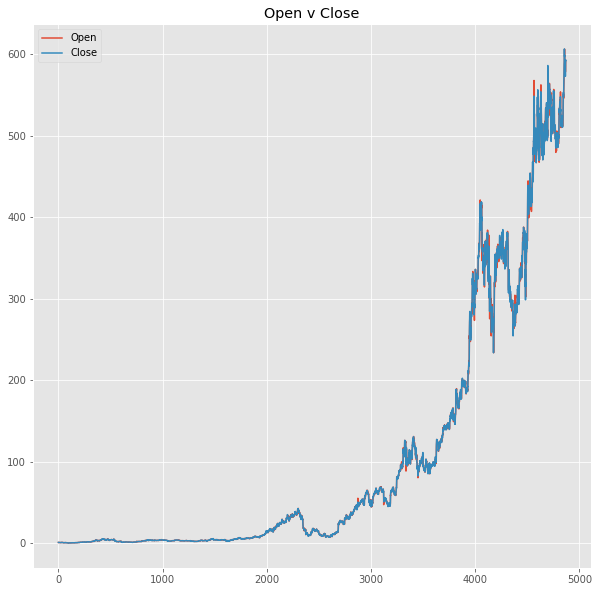

In [145]:
plot_stock('Open')
plot_stock('Close')
plt.title('Open v Close')
plt.legend();

In [176]:
X = np.array(df_acciones[["Open","Close"]])
y = np.array(df_acciones['Date'])
#forma de la matriz
X.shape

(4870, 2)

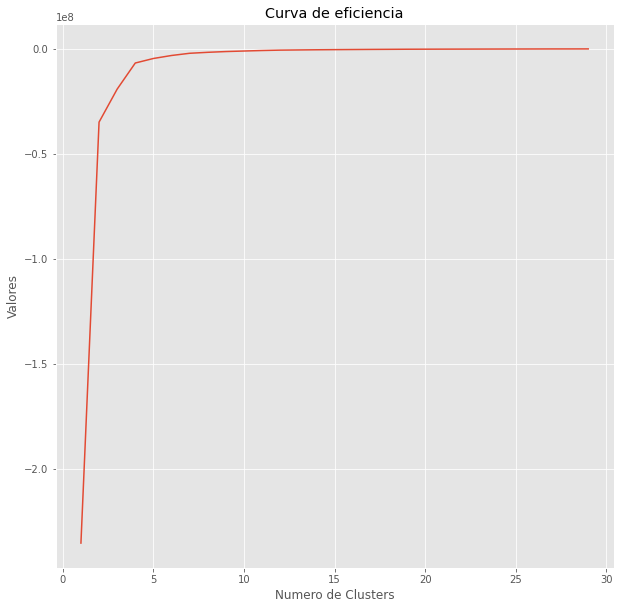

In [177]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

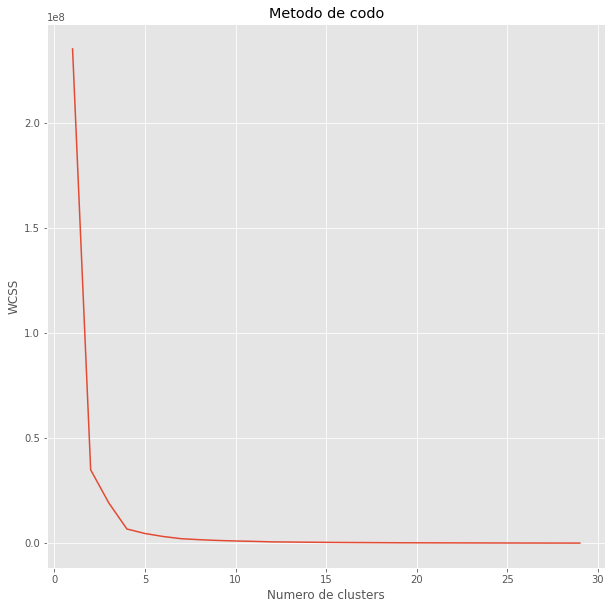

In [178]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [179]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[127.51494278 127.57264025]
 [508.44473164 508.51495741]
 [ 14.88817864  14.89616977]
 [332.45965004 332.63528853]]


In [180]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])

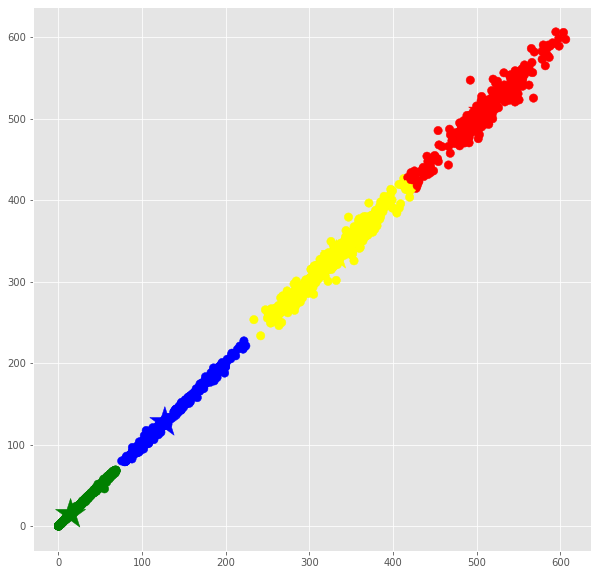

In [181]:
# mostramos grupos según Openess y Extraversion 
f1 = df_acciones['Open'].values
f2 = df_acciones['Close'].values

#
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

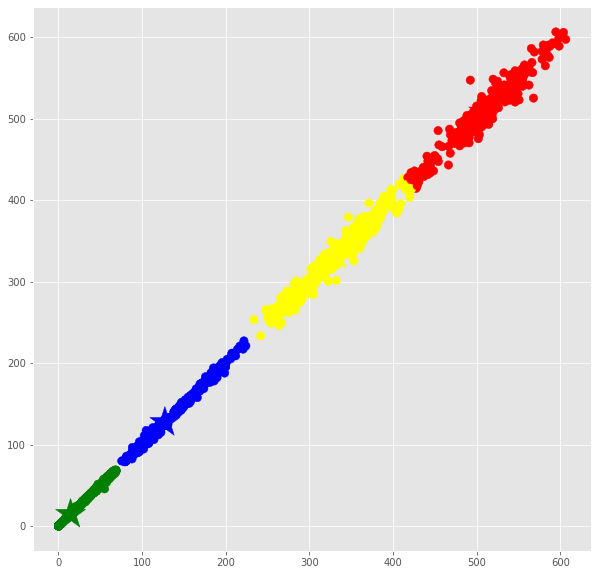

In [182]:
# mostramos grupos según Openess y Extraversion 
f1 = df_acciones['Open'].values
f2 = df_acciones['Close'].values

#
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [188]:

copy =  pd.DataFrame()
copy['Date']=df_acciones['Date'].values
copy['Open']=df_acciones['Open'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,698
1,red,355
2,green,3246
3,yellow,571


In [189]:

copy =  pd.DataFrame()
copy['Date']=df_acciones['Date'].values
copy['Close']=df_acciones['Close'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,698
1,red,355
2,green,3246
3,yellow,571


In [195]:

df_cluster = pd.DataFrame()
df_cluster['data_index']= df_acciones.index.values
df_cluster['data_index']= df_acciones.Date
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,2002-05-23,2
1,2002-05-24,2
2,2002-05-28,2
3,2002-05-29,2
4,2002-05-30,2


In [196]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_acciones.index.values
df_cluster['data_index']= df_acciones.Open
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,1.156429,2
1,1.214286,2
2,1.213571,2
3,1.164286,2
4,1.107857,2


In [197]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_acciones.index.values
df_cluster['data_index']= df_acciones.Close
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,1.196429,2
1,1.210000,2
2,1.157143,2
3,1.103571,2
4,1.071429,2
